In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from insightface.app import FaceAnalysis

In [2]:
app = FaceAnalysis(name="buffalo_s", providers=['CUDAExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))

c:\Users\I\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\I/.insightface\models\buffalo_s\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\I/.insightface\models\buffalo_s\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\I/.insightface\models\buffalo_s\det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\I/.insightface\models\buffalo_s\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\I/.insightface\models\buffalo_s\w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-siz

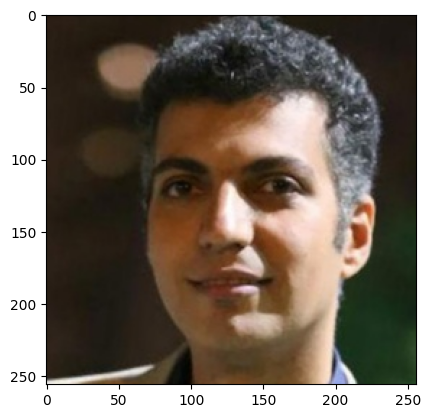

In [3]:
image_1 = cv2.imread("input\img1.jpg")
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
plt.imshow(image_1)
plt.show()

In [4]:
result_1 = app.get(image_1)

In [5]:
result_1

[{'bbox': array([ 72.1011 ,  50.95461, 201.61502, 236.23148], dtype=float32),
  'kps': array([[ 96.86538, 119.17549],
         [156.61258, 119.6589 ],
         [118.39166, 154.32425],
         [100.11542, 183.84746],
         [152.81389, 184.57986]], dtype=float32),
  'det_score': np.float32(0.6420617),
  'landmark_3d_68': array([[ 7.01995621e+01,  1.28480789e+02,  1.16043686e+02],
         [ 7.30528107e+01,  1.47843994e+02,  1.10760902e+02],
         [ 7.63218155e+01,  1.67802231e+02,  1.03892067e+02],
         [ 8.00904160e+01,  1.86919800e+02,  9.37446747e+01],
         [ 8.38291245e+01,  2.04031082e+02,  7.53780060e+01],
         [ 9.10155029e+01,  2.16621353e+02,  5.89873009e+01],
         [ 9.93582153e+01,  2.25210083e+02,  4.45444298e+01],
         [ 1.09350883e+02,  2.30522247e+02,  2.70592880e+01],
         [ 1.29673874e+02,  2.34280121e+02,  1.61424828e+01],
         [ 1.53012131e+02,  2.29531586e+02,  2.02126446e+01],
         [ 1.71403931e+02,  2.21808289e+02,  3.47860680e+

In [6]:
embedding_1 = result_1[0]["embedding"]

In [7]:
result_1[0]["embedding"].shape

(512,)

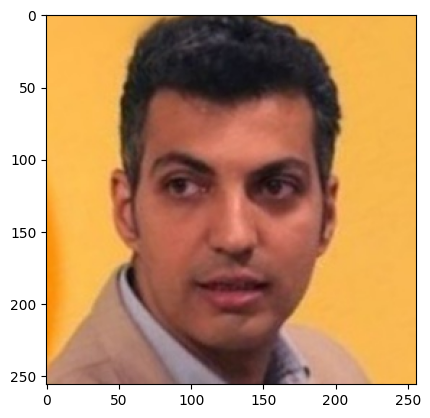

In [8]:
image_2 = cv2.imread("input\img2.jpg")
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)
plt.imshow(image_2)
plt.show()

In [9]:
result_2 = app.get(image_2)

In [10]:
embedding_2 = result_2[0]["embedding"]

In [11]:
np.sqrt(np.sum((embedding_1 - embedding_2)**2))

np.float32(19.722395)